### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Config

In [14]:
path_data_2021 = "./data_2021.csv"
path_data_2022 = "./data_2022.csv"

### 3. Read data

In [20]:
def getDataFromPath(path):
    df = pd.read_csv(path)
    df = df[['open_time', 'close', 'volume', 'count', 'taker_buy_volume', 'symbol']]
    df = df[df["symbol"].isin(['BNBUSDT', 'BTCUSDT', 'ETHUSDT'])]
    df.set_index('open_time', inplace=True)
    symbol_mapping = {'BNBUSDT': 0, 'BTCUSDT': 1, 'ETHUSDT': 2}
    df['symbol'] = df['symbol'].map(symbol_mapping).fillna(df['symbol'])
    return df

In [23]:
data_2021 = getDataFromPath(path_data_2021)
data_2022 = getDataFromPath(path_data_2022)

In [34]:
# Concatenate the two DataFrames vertically
data = pd.concat([data_2021, data_2022], ignore_index=False)

In [35]:
data.describe()

,close,volume,count,taker_buy_volume,symbol
count,52200.000000,5.220000e+04,5.220000e+04,5.220000e+04,52200.000000
mean,13521.023689,1.015828e+05,1.149467e+05,4.998150e+04,1.003678
std,19008.394501,1.541695e+05,1.093513e+05,7.582345e+04,0.817059
min,35.928000,6.393200e+01,2.560000e+02,2.810000e+01,0.000000
25%,427.250000,1.974144e+04,4.615875e+04,9.726877e+03,0.000000
50%,2159.870000,5.291633e+04,8.558100e+04,2.603645e+04,1.000000
75%,23146.900000,1.234828e+05,1.463148e+05,6.077305e+04,2.000000
max,68714.850000,5.033084e+06,2.435575e+06,2.353070e+06,2.000000


**noted**
*Range of Values:*
- The "close" column has a wide range, with the minimum value at 35.928 and the maximum value at 68714.85.
- The "volume," "count," and "taker_buy_volume" columns also exhibit a large range of values, with considerable differences between the minimum and maximum.

*Distribution:*
- The mean values for "close," "volume," "count," and "taker_buy_volume" are quite different, indicating potential differences in the distribution of these features.
- The standard deviations (std) are also relatively high, suggesting variability in the data.

*Skewness:*
- You might want to check for skewness in the distribution of the columns. Positive skewness would mean a longer right tail, while negative skewness would indicate a longer left tail.

*Symbol Column:*
- The "symbol" column seems to represent categorical data, with values ranging from 0 to 2. This column might be better suited for one-hot encoding if used as a feature in a machine learning model.

### 4. Normalization

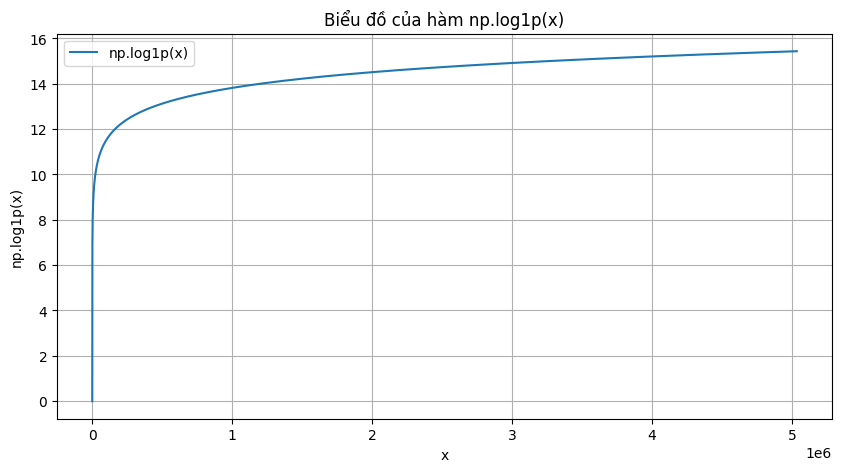

In [30]:
# decline the skewness of distribution

import numpy as np
import matplotlib.pyplot as plt

# Tạo một dãy giá trị x trong khoảng từ -1 đến 1
x_values = np.linspace(0, 5.033084e+06, 10000)

# Tính giá trị của hàm np.log1p cho mỗi giá trị x
log1p_values = np.log1p(x_values)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))

plt.plot(x_values, log1p_values, label='np.log1p(x)')

plt.title('Biểu đồ của hàm np.log1p(x)')
plt.xlabel('x')
plt.ylabel('np.log1p(x)')


plt.legend()
plt.grid(True)
plt.show()

In [36]:
data.head()

,close,volume,count,taker_buy_volume,symbol
open_time,,,,,
1609459200000,37.425,59137.100,7819,26684.830,0
1609459200000,29015.000,8037.588,65942,3983.842,1
1609459200000,734.600,98092.526,52261,44054.348,2
1609462800000,37.682,134949.830,11503,72837.830,0
1609462800000,29448.400,19543.401,127126,10386.352,1


In [37]:
def log1p_scaling(data):
    data_norm = data.copy()
    data_norm['close'] = np.log1p(data['close'])
    data_norm['volume'] = np.log1p(data['volume'])
    data_norm['count'] = np.log1p(data['count'])
    data_norm['taker_buy_volume'] = np.log1p(data['taker_buy_volume'])
    return data_norm

In [39]:
df_norm_log1p = log1p_scaling(data)
df_norm_log1p.head()

,close,volume,count,taker_buy_volume,symbol
open_time,,,,,
1609459200000,3.648708,10.987631,8.964440,10.191888,0
1609459200000,10.275603,8.992009,11.096546,8.290253,1
1609459200000,6.600686,11.493677,10.864025,10.693202,2
1609462800000,3.655374,11.812666,9.350450,11.196004,0
1609462800000,10.290429,9.880444,11.752942,9.248344,1


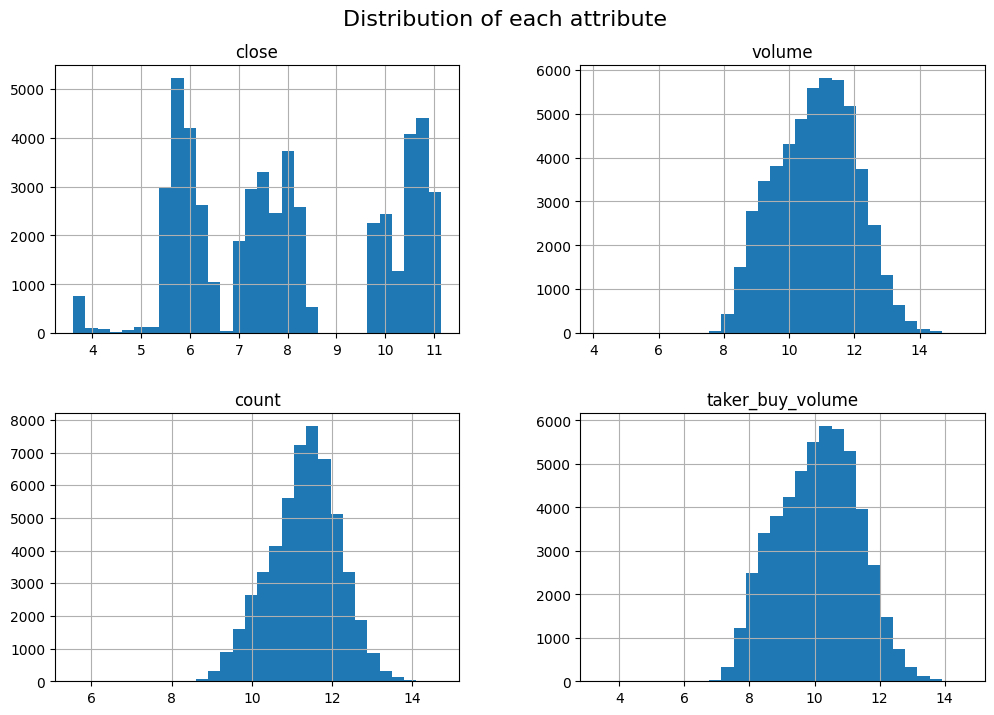

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Select columns of interest
selected_columns = ['close', 'volume', 'count', 'taker_buy_volume']
selected_df = df_norm_log1p[selected_columns]

# Plot histograms for selected columns
selected_df.hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of each attribute', y=0.95, fontsize=16)
plt.show()


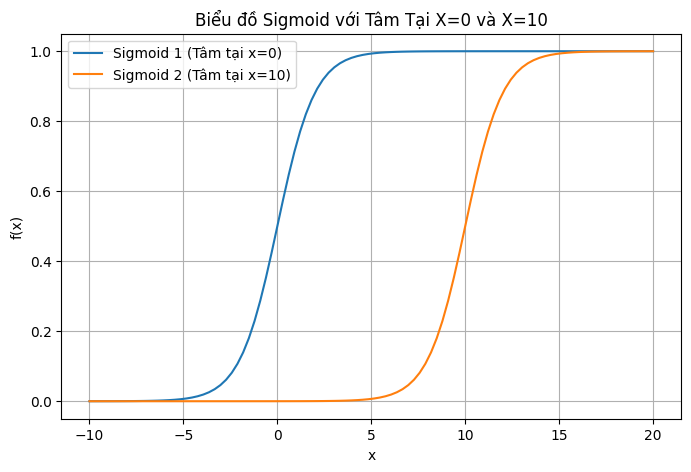

In [46]:
# Định nghĩa hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Biến độc lập x trong khoảng từ -5 đến 15
x_values = np.linspace(-10, 20, 100)

# Hàm sigmoid với tâm tại x = 0
sigmoid_1 = sigmoid(x_values)

# Hàm sigmoid với tâm tại x = 10
sigmoid_2 = sigmoid(x_values - 10)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))

plt.plot(x_values, sigmoid_1, label='Sigmoid 1 (Tâm tại x=0)')
plt.plot(x_values, sigmoid_2, label='Sigmoid 2 (Tâm tại x=10)')

plt.title('Biểu đồ Sigmoid với Tâm Tại X=0 và X=10')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.grid(True)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18860\1782796381.py:5: RuntimeWarning: invalid value encountered in log1p
  return 1 / (1 + np.exp(-(np.log1p(x) - 10)))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18860\1782796381.py:17: RuntimeWarning: invalid value encountered in log1p
  plt.plot(np.log1p(x_values), log1p_sigmoid_2, label='log1p_sigmoid 2 (Tâm tại x=10)')


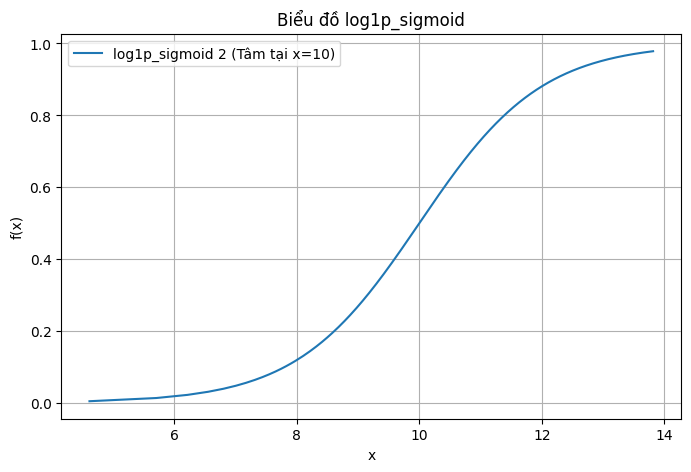

In [70]:
## biểu đồ hàm normalize

# Định nghĩa hàm Normalize cho bài toán
def log1p_sigmoid(x):
    return 1 / (1 + np.exp(-(np.log1p(x) - 10)))

# Biến độc lập x trong khoảng từ -5 đến 15
x_values = np.linspace(-1000000, 1000000, 10000)


# Hàm log1p_sigmoid với tâm tại x = 10
log1p_sigmoid_2 = log1p_sigmoid(x_values)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))

plt.plot(np.log1p(x_values), log1p_sigmoid_2, label='log1p_sigmoid 2 (Tâm tại x=10)')

plt.title('Biểu đồ log1p_sigmoid')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.grid(True)
plt.show()

In [69]:
np.log1p(60000)

11.002116507732017

In [47]:
def log1p_sigmoid_scaling(data):
    data_norm = data.copy()
    data_norm['close'] = 1 / (1 + np.exp(-(np.log1p(data['close']) - 10)))
    data_norm['volume'] = 1 / (1 + np.exp(-(np.log1p(data['volume']) - 10)))
    data_norm['count'] = 1 / (1 + np.exp(-(np.log1p(data['count']) - 10)))
    data_norm['taker_buy_volume'] = 1 / (1 + np.exp(-(np.log1p(data['taker_buy_volume']) - 10)))
    return data_norm

def reverse_log1p_sigmoid_scaling(data_norm):
    data_rev = data_norm.copy()
    data_rev['close'] = np.expm1(-np.log(1/data_norm['close'] - 1) + 10)
    data_rev['volume'] = np.expm1(-np.log(1/data_norm['volume'] - 1) + 10)
    data_rev['count'] = np.expm1(-np.log(1/data_norm['count'] - 1) + 10)
    data_rev['taker_buy_volume'] = np.expm1(-np.log(1/data_norm['taker_buy_volume'] - 1) + 10)
    return data_rev


In [48]:
data_norm = log1p_sigmoid_scaling(data)

In [58]:
data_norm.head()

,close,volume,count,taker_buy_volume,symbol
open_time,,,,,
1609459200000,0.001741,0.728620,0.262008,0.547825,0
1609459200000,0.568468,0.267373,0.749612,0.153197,1
1609459200000,0.032317,0.816629,0.703501,0.666679,2
1609462800000,0.001753,0.859684,0.343091,0.767813,0
1609462800000,0.572101,0.470147,0.852323,0.320461,1


In [50]:
reverse_log1p_sigmoid_scaling(data_norm).head()

,close,volume,count,taker_buy_volume,symbol
open_time,,,,,
1609459200000,37.425,59137.100,7819.0,26684.830,0
1609459200000,29015.000,8037.588,65942.0,3983.842,1
1609459200000,734.600,98092.526,52261.0,44054.348,2
1609462800000,37.682,134949.830,11503.0,72837.830,0
1609462800000,29448.400,19543.401,127126.0,10386.352,1


In [59]:
data.head()

,close,volume,count,taker_buy_volume,symbol
open_time,,,,,
1609459200000,37.425,59137.100,7819,26684.830,0
1609459200000,29015.000,8037.588,65942,3983.842,1
1609459200000,734.600,98092.526,52261,44054.348,2
1609462800000,37.682,134949.830,11503,72837.830,0
1609462800000,29448.400,19543.401,127126,10386.352,1


### 5. Save

In [60]:
data_norm.to_csv("./data_norm_2021_2022.csv", index=True)